In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
inten_abajo_df = pd.read_csv("inten-50micr-abajo.csv",header = None)

In [5]:
inten_arriba_df = pd.read_csv("inten-50micr-arriba.csv",header = None)

In [6]:
frames = [inten_abajo_df,inten_arriba_df]
inten_df = pd.concat(frames)

In [7]:
inten_df.to_pickle('inten_fin.pkl')

In [9]:
inten_df = pd.read_pickle('inten_fin.pkl')
inten_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3638,3639,3640,3641,3642,3643,3644,3645,3646,3647
0,0.000729,-0.000374,-0.000047,-0.000794,0.000276,-0.000635,0.000316,0.000076,-0.000455,-0.000696,...,-0.000321,0.000133,-0.000047,0.000149,-0.001019,0.000157,-0.001043,-0.000725,-0.000623,0.000231
1,0.000144,0.000181,-0.000166,-0.000456,0.000724,-0.000280,0.000156,-0.000517,0.000851,-0.000382,...,-0.000350,0.000357,-0.000174,-0.000003,-0.000534,0.000161,-0.000848,0.000083,-0.000570,-0.000334
2,0.000615,0.000101,0.000489,-0.000001,0.000268,-0.000520,0.000640,0.000027,0.000203,-0.000067,...,-0.000136,0.000252,-0.000250,-0.000320,-0.000438,-0.000169,-0.000834,-0.000079,-0.000704,-0.000067
3,0.000263,-0.000357,0.000357,-0.000002,0.000786,-0.000263,0.000202,-0.000590,0.000782,-0.000370,...,-0.000231,0.000116,-0.000398,0.000071,-0.001019,-0.000811,-0.000802,-0.001354,-0.000267,-0.000121
4,0.000775,-0.000793,0.000346,-0.000254,-0.000205,0.000105,0.000232,-0.000356,0.000171,-0.000650,...,-0.000417,0.000097,-0.000270,-0.000274,-0.000936,-0.000168,-0.000409,-0.000319,-0.000658,-0.000372


In [10]:
inten_array = inten_df.iloc[:, 0:].values

In [11]:
RGB_up_df = pd.read_csv('RGB-colors-50micron-arriba.csv',header=None)
RGB_down_df = pd.read_csv('RGB-colors-50micron-abajo.csv',header=None)
RGB_frames = [RGB_down_df,RGB_up_df]
RGB_df = pd.concat(RGB_frames)

In [12]:
RGB_df.to_pickle('RGB_fin.pkl')

In [13]:
R_array = RGB_df.iloc[:,0].values
G_array = RGB_df.iloc[:,1].values
B_array = RGB_df.iloc[:,2].values

In [14]:
xy_pos_df = pd.read_csv('xy_positions_FULL50micron.csv',header=None)
xy_pos_df.to_pickle('xy_pos_df.pkl')

In [15]:
wavel_df = pd.read_csv('long_de_onda_1_tira.csv')

In [16]:
wavel_df.to_pickle('wavel_df.pkl')

In [43]:
light_dff = pd.read_csv('source_spectrum_max_power.csv')
light_dff = light_dff['[Data]'].str.split(';', expand=True)

light_dff = light_dff.apply(pd.to_numeric, errors='coerce')
light_df = light_dff.iloc[:,1]
light_df
light_df.to_pickle('light_df.pkl')

In [31]:
light_df = pd.read_pickle('light_df.pkl')
light_df.iloc[:]

0        1.159276464e-03
1        2.005786228e-04
2        9.552981937e-04
3       -8.805061225e-04
4        2.423941623e-03
              ...       
3643     5.065459991e-04
3644    -1.665822492e-04
3645     8.329112316e-04
3646     1.036889502e-03
3647     9.858948761e-05
Name: 1, Length: 3648, dtype: object

In [29]:
inten_df = pd.read_pickle('inten_fin.pkl')
inten_df.iloc[0,:]

0       0.000729
1      -0.000374
2      -0.000047
3      -0.000794
4       0.000276
          ...   
3643    0.000157
3644   -0.001043
3645   -0.000725
3646   -0.000623
3647    0.000231
Name: 0, Length: 3648, dtype: float64

In [ ]:
'inten_paso_500micrones.csv'

<IPython.core.display.Javascript object>


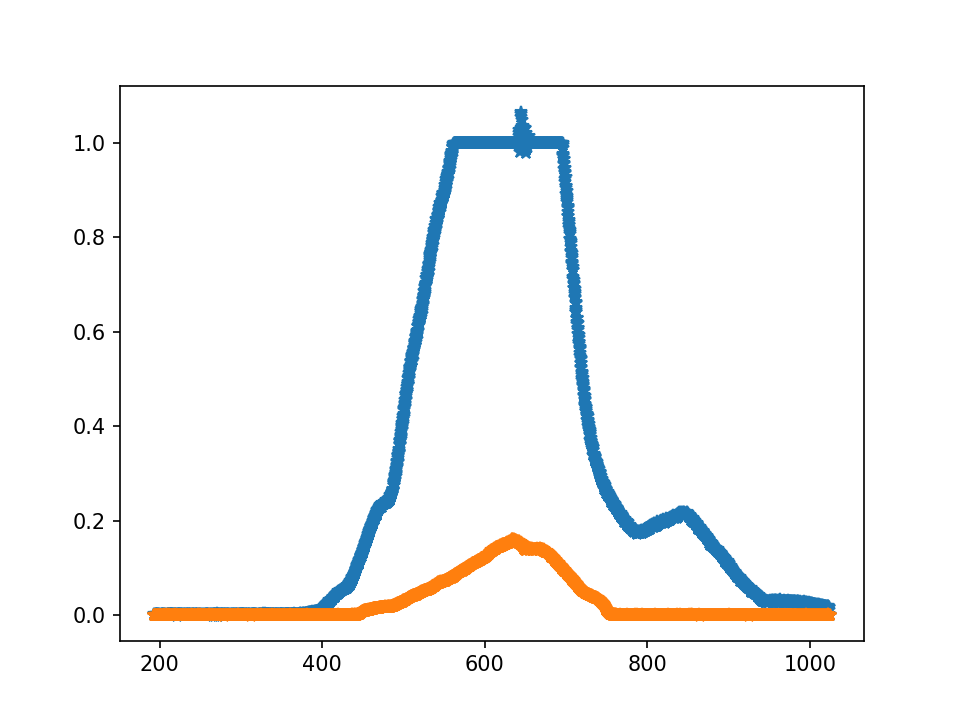

In [74]:
alo = (inten_df.iloc[0,:]/light_df.iloc[:]).abs()

plt.plot(wavel_df.iloc[:, 0], light_df.iloc[:], '*')
plt.plot(wavel_df.iloc[:, 0], inten_df.iloc[70000,:], '*')


In [33]:
light_df.iloc[:]

0        1.159276464e-03
1        2.005786228e-04
2        9.552981937e-04
3       -8.805061225e-04
4        2.423941623e-03
              ...       
3643     5.065459991e-04
3644    -1.665822492e-04
3645     8.329112316e-04
3646     1.036889502e-03
3647     9.858948761e-05
Name: 1, Length: 3648, dtype: object

In [7]:
dx = 3
dz = 3
x_array_scan = np.arange(0,300,dx)
z_array_scan = np.arange(0,300,dz)
pos = []

for ndx, y in enumerate(z_array_scan):
    if ndx % 2:
        for x in reversed(x_array_scan):
            pos.append(x, y)
    else:
        for x in x_array_scan:
            pos.append(x, y)
            
print(pos)

TypeError: append() takes exactly one argument (2 given)